In [12]:
import re
import os
import keras
import numpy as np
import pandas as pd
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
IMG_DIRS = [
    '/datasets/kaggle/painters/train',
    '/datasets/kaggle/painters/test'
]

ENCODED_DATA_DIR = {
    'bottlenecks': 'out/bottlenecks',
    'dimensions': 'out/dimensions'
}

MODEL_FILE = 'out/same-artist-2b@83.943.h5'

In [3]:
# create sample from bottlecks and aspects of a pair of images
def get_sample(fid):
    bottleneck = np.fromfile(ENCODED_DATA_DIR['bottlenecks'] + '/' + str(fid), dtype=np.float32)
    dims = np.fromfile(ENCODED_DATA_DIR['dimensions'] + '/' + str(fid), dtype=np.float32)
    return bottleneck, dims

# create feature vector for a pair of fids
def get_pair_feature(fid1, fid2):
    s1 = get_sample(fid1)
    s2 = get_sample(fid2)
    feature = np.concatenate((
            [s1[1][0] / s1[1][1]], # image 1 AR  x1
            [s2[1][0] / s2[1][1]], # image 2 AR  x1
            s1[0], # image 1 features            x2048
            s2[0] # image 2 features             x2048
        )).astype(np.float32)
    return feature

In [ ]:
# load model
model = keras.models.load_model(MODEL_FILE)

In [10]:
from keras.utils import visualize_util
visualize_util.plot(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [16]:
def find_f_by_fid(fid):
    global IMG_DIRS
    for d in IMG_DIRS:
        f = d + '/' + str(fid) + '.jpg.correct.jpg'
        if os.path.isfile(f): return f
        else:
            f = d + '/' + str(fid) + '.jpg'
            if os.path.isfile(f): return f

In [76]:
def eval_pair(fid1, fid2):
    global model
    feature = get_pair_feature(fid1, fid2)
    feature = np.reshape(feature, (1,4098))
    y_p = model.predict(feature)
    return y_p

In [107]:
fid1 = 27254
fid2 = 47145

In [101]:
fid1 = 99733
fid2 = 47170

In [105]:
# not the same, but reporting same
fid1 = 100054
fid2 = 100024

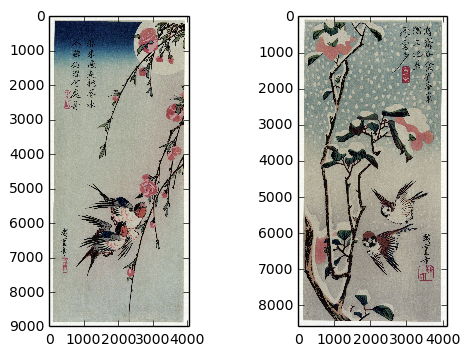

In [108]:
# show pair of images
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(plt.imread(find_f_by_fid(fid1)))
fig.add_subplot(1,2,2)
plt.imshow(plt.imread(find_f_by_fid(fid2)))

In [103]:
eval_pair(fid1, fid2)

array([[ 0.83205593,  0.16794409]], dtype=float32)

In [104]:
eval_pair(fid2, fid1)

array([[ 0.8900528,  0.1099472]], dtype=float32)

In [93]:
find_f_by_fid(fid2)

'/datasets/kaggle/painters/test/100004.jpg'